In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Lab2_ADC_Data/part1/section7.xlsx')

In [3]:
prop = df.iloc[:14]
prop

,"Part 1: Bit resolution, Gain and Offset",Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Amplitude (V),10.0
3,Phase (Deg),0.0
4,Frequency (Hz),2.0
5,Resolution (bit),4.0
6,Sample Rate (smp/sec),1000.0
7,Sample Time (sec),1.0
8,Range Max (V),10.0
9,Range Min (V),0.0


In [4]:
gain = prop.loc[10, 'Unnamed: 1']
offset = prop.loc[11, 'Unnamed: 1']

In [5]:
data = df.iloc[14:]
old_column = data.columns

In [6]:
data.rename(columns={old_column[0]:'$V _{ADC}$', old_column[1]:'delete'}, inplace=True)
data.drop(['delete'], axis=1, inplace=True)

C:\Users\owner\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\owner\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
data['time[sec]'] = [(lambda x: (x)/len(data)) (x) for x in range(len(data))] 
data

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,$V _{ADC}$,time[sec]
14,4.062,0.000
15,4.062,0.001
16,4.062,0.002
17,4.062,0.003
18,4.062,0.004
...,...,...
1009,3.437,0.995
1010,4.062,0.996
1011,4.062,0.997
1012,4.062,0.998


## Now we'll add restored $V _{in}$ by this calculation:
$$ V _{in} = \frac{(V_{ADC} - V _{offset})}{Gain} $$

In [8]:
colo = sns.color_palette("cubehelix", 8)

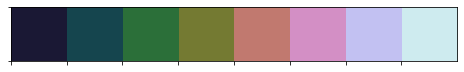

In [9]:
sns.palplot(colo)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


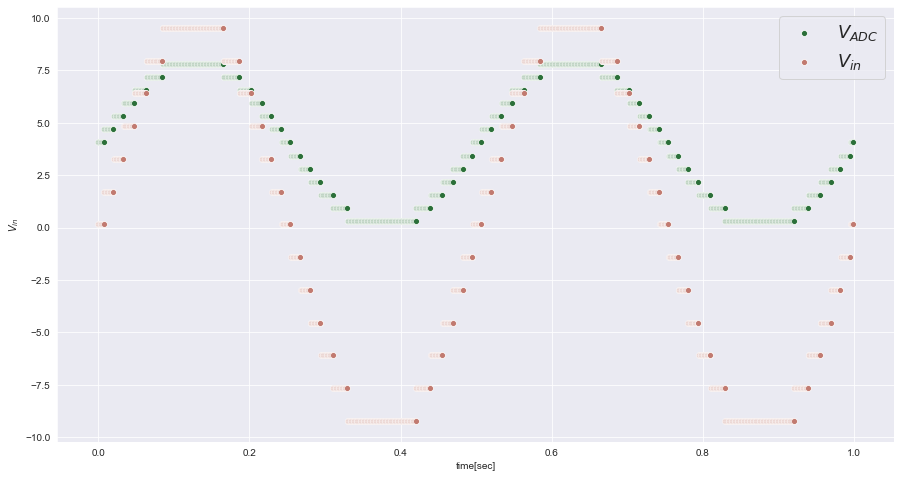

In [10]:
data['$V _{in}$'] = data['$V _{ADC}$'].apply(lambda x: (x-offset)/gain)
fig = plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.scatterplot(x='time[sec]', y='$V _{ADC}$', data=data, color=colo[2])
sns.scatterplot(x='time[sec]', y='$V _{in}$', data=data, color=colo[4])
plt.legend(['$V _{ADC}$', '$V _{in}$'], fontsize=18)
#plt.savefig('section7.png')

## Question 10:
### $$ Gain = \frac {V_{ADC,max} - V_{ADC,min}}{V_{in,max} - V_{in,min}}$$
### $$ Offset = V_{ADC,avg} - V_{in,avg} $$
### $$ Offset = \frac {V_{ADC,max} + V_{ADC,min}}{2} - \frac {V_{in,max} + V_{in,min}}{2}$$
### $$ offset = V_{ADC middle} + \frac {V_{in,max} + V_{in,min}}{2}*Gain $$

In [20]:
part_c_1 = [0.3924, -0.2108, 0.8664, -0.8997, 0.6236, 0.203, 0.5894, -0.3361, 0.1459, 0.0671]

In [21]:
# in this std calculation we use N (number of samples) unlike stdev (excel, statistics) which uses N-1:

np.std(part_c_1)

0.4966939154046484

In [22]:
np.average(part_c_1)

0.14411999999999997

In [14]:
part_c_2 = [-0.1156, 0.1643, -0.162, -0.1788, 0.1973, 0.1381, 0.1488, -0.172, -0.052, 0.1869]

In [15]:
np.std(part_c_2)

0.15605407396155987

In [16]:
np.average(part_c_2)

0.015500000000000009

In [40]:
import glob
from PIL import Image

# for i in [1, 2, 3, 4, 5]:    
#     img = Image.open('Lab2_ADC_Data/part2/togif/5.bmp')
#     new_img = img.resize( (256, 256) )
#     new_img.save('Lab2_ADC_Data/part2/togif/5.png', 'png')
    
# Create the frames
frames = []
imgs = glob.glob("Lab2_ADC_Data/part2/togif/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

#Save into a GIF file that loops forever

frames[0].save('Lab2_ADC_Data/part2/togif/png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000, loop=0)

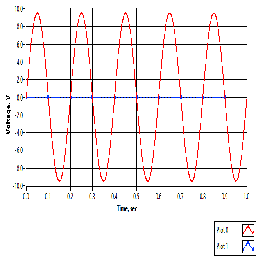